# Subway Data Analysis

## Table of Contents

- [Introduction](#intro)
- [About this project](#about)
- [Part 1 - Data Gathering](#s1)
- [Part 2 - Data Analysis](#s2)
- [Part 3 - MapReduce](#s3)
- [Conclusion](#conclusion)


<a id="intro"></a>
## Introduction

The NYC public transportation system - Metro Transit Authority - provides data for download via csv files. Part of the information available are data from the subway turnstiles, containing weekly logs for cumulative entries and exits by turnstile and by subway station during a provided timeframe.


For this project, we will only use the information available [here](http://web.mta.info/developers/turnstile.html).

<a id="about"></a>
# About this project

For this project, you will apply the knowledge acquired in the first part of this course. We will practice basic **data acquisition** and **data cleaning** tasks to find out fundamental stuff about the data through a statistical approach.

The goal of this project is to explore the relationship between data from the **NYC Subway turnstiles** and the **city weather.** For this, besides data from the subway, we will also need data from the **weather in NYC.**

Here are the main points that will be considered in this work:

- **Gathering data** from the Internet
- **Using Statistics** for Data Analysis
- **Data handling** and **simple graphics creation** with `Pandas`


<a id="s1"></a>

## Part 1 - Data Gathering

### *Exercise 1.1*

Let's do it!! Now it's your turn to gather data. Please write below a Python code to access the link http://web.mta.info/developers/turnstile.html and download all files from **June 2017.** The file must be named *turnstile_100617.txt*, where 10/06/17 is the file's date.

Please see below a few commands that might help you:

Use the **urllib** library to open and redeem a webpage. Use the command below, where **url** is the webpage path to the following file:

```python
u = urllib.urlopen(url)
html = u.read()
```

Use the **BeautifulSoup** library to search for the link to the file you want to download in the page. Use the command below to create your *soup* object and search for all 'a' tags in the document:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

A tip to only download the files from June is to check data in the name of the file. For instance, to download the 17/06/2017 file, please see if the link ends with *"turnstile_170610.txt"*. If you forget to do this, you will download all files from that page. In order to do this, you can use the following command:

```python
if '1706' in link.get('href'):
```

Our final tip is to use the command below to download the txt file:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

In [1]:
# imports
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib

%config InlineBackend.figure_format = 'retina'

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "http://web.mta.info/developers/turnstile.html"
u = urllib.urlopen(url)
html = u.read()

In [3]:
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')

In [4]:
for a_tag in links:
    page = a_tag.get("href")
    
    if (page is not None) and ("1706" in page):
        
        # this prefix is common to all file URLs
        link_prefix = "http://web.mta.info/developers/"
        
        # this suffix depends on the date for we want to retrieve data
        link_suffix = str(page)
        
        # filename from URL without extension
        filename = str(page).split("/")[-1][10:-4]
        
        # formatting of datetime as mentioned above
        day, month, year = filename[-2:], filename[-4:-2], filename[:2]
        
        # order it to create the specified file name
        filename = "turnstile_" + day + month + year + ".txt"
        print filename
        
        # download URL
        link_do_arquivo = link_prefix + link_suffix
        
        print link_do_arquivo
        urllib.urlretrieve(link_do_arquivo, filename)

turnstile_240617.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170624.txt
turnstile_170617.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170617.txt
turnstile_100617.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170610.txt
turnstile_030617.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt


### *Exercise 1.2*

Write down a function that takes the list of all names of the files you downloaded in Exercise 1.1 and compile them into one single file. There must be only one header line in the output file. 

For example, if file_1 has:
line 1...
line 2...

and the other file, file_2, has:
line 3...
line 4...
line 5...

We must combine file_1 and file_2 into one master file, as follows:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
line 1...
line 2...
line 3...
line 4...
line 5...


In [5]:
def create_master_turnstile_file(filenames, output_file):
    """
    Combine all the file to a single master file
    
    Args:
    - filenames list: List of files to be concatenated to a single one
    - output_file str: Output file to save the combined result
    
    Returns:
    None
    """
    with open(output_file, 'w') as master_file:
        # create header
        master_file.write('C/A,UNIT,SCP,STATION, LINENAME, DIVISION, \
        DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            # write file content to master_file
            with open(filename) as f:
                for line in f:
                    master_file.write(line)

In [6]:
filenames = ["turnstile_030617.txt", "turnstile_100617.txt", \
             "turnstile_170617.txt", "turnstile_240617.txt"]

create_master_turnstile_file(filenames, "master_file.txt")

### *Exercise 1.3*

For this exercise, you will write a function that reads the master_file created in the previous exercise and load it into a Pandas Dataframe. This function can be filtered, so that the Dataframe only has lines where column "DESCn" has the value "Regular".

For example, if the Pandas Dataframe looks like this:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

The Dataframe must look like the following, after filtering only the lines where column DESCn has the value REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [7]:
def filter_by_regular(filename):
    """
    Filters data containing only DESCn = "REGULAR"
    
    Args:
    - filename str: TXT file which contains turnstile data
    
    Returns:
    - turnstile_data pandas.DataFrame: Filtered data frame containing only rows
    for which column `DESCn` = "REGULAR"
    """
    # read
    turnstile_data = pd.read_csv(filename)
    # filter
    turnstile_data = turnstile_data.query(" DESCn == 'REGULAR' ")
    return turnstile_data

In [8]:
print(filter_by_regular("master_file.txt").head())

    C/A  UNIT       SCP STATION  LINENAME  DIVISION          DATEn     TIMEn  \
1  A002  R051  02-00-00   59 ST   NQR456W       BMT     05/27/2017  00:00:00   
2  A002  R051  02-00-00   59 ST   NQR456W       BMT     05/27/2017  04:00:00   
3  A002  R051  02-00-00   59 ST   NQR456W       BMT     05/27/2017  08:00:00   
4  A002  R051  02-00-00   59 ST   NQR456W       BMT     05/27/2017  12:00:00   
5  A002  R051  02-00-00   59 ST   NQR456W       BMT     05/27/2017  16:00:00   

     DESCn    ENTRIESn                                             EXITSn  
1  REGULAR  0006195217  0002098317                                    ...  
2  REGULAR  0006195240  0002098318                                    ...  
3  REGULAR  0006195256  0002098347                                    ...  
4  REGULAR  0006195346  0002098432                                    ...  
5  REGULAR  0006195518  0002098491                                    ...  


### *Exercise 1.4*


The NYC Subway data has cumulative entry and exit data in each line. Let's assume you have a Dataframe called df, which contains only lines for one particular turnstile (unique SCP, C/A, and UNIT). The following function must change these cumulative entries for counting all entries since the last reading (entries from the last line of the Dataframe).

More specifically, there are two things you should do:

1 - Create a new column, called ENTRIESn_hourly

2 - Insert in this column the difference between ENTRIESn in the current and the previous column. If the line has any NAN, fill it out/replace by 1.

Tip: The funtions shift() and fillna() in Pandas might be useful for this exercise.

Below you will find and example of how your Dataframe should look by the end of this exercise:

        C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

In [9]:
import pandas

def get_hourly_entries(df):
    """
    Creates a new column and stores hourly entries in it.
    
    Args:
    - df pandas.DataFrame: Data frame from which the new column will be
    created
    
    Returns:
    - df pandas.DataFrame: Same data frame with "ENTRIESn_hourly" column added
    """
    
    # calculate hourly difference for entries
    df["ENTRIESn_hourly"] = pd.to_numeric(df["ENTRIESn"]) - \
                            pd.to_numeric(df["ENTRIESn"].shift())
    # nan handling
    df["ENTRIESn_hourly"] = df["ENTRIESn_hourly"].fillna(1).astype(int)

    return df

In [10]:
df = filter_by_regular("master_file.txt")
print(get_hourly_entries(df).head())

    C/A  UNIT       SCP STATION  LINENAME  DIVISION          DATEn     TIMEn  \
1  A002  R051  02-00-00   59 ST   NQR456W       BMT     05/27/2017  00:00:00   
2  A002  R051  02-00-00   59 ST   NQR456W       BMT     05/27/2017  04:00:00   
3  A002  R051  02-00-00   59 ST   NQR456W       BMT     05/27/2017  08:00:00   
4  A002  R051  02-00-00   59 ST   NQR456W       BMT     05/27/2017  12:00:00   
5  A002  R051  02-00-00   59 ST   NQR456W       BMT     05/27/2017  16:00:00   

     DESCn    ENTRIESn                                             EXITSn  \
1  REGULAR  0006195217  0002098317                                    ...   
2  REGULAR  0006195240  0002098318                                    ...   
3  REGULAR  0006195256  0002098347                                    ...   
4  REGULAR  0006195346  0002098432                                    ...   
5  REGULAR  0006195518  0002098491                                    ...   

   ENTRIESn_hourly  
1                1  
2             

### *Exercise 1.5*

Do the same thing you did in the previous exercise, but taking into account the exits, column EXITSn.
For this, you need to create a column called EXITSn_hourly and insert the difference between the column EXITSn in the current line vs he previous line. If there is any NaN, fill it out/replace by 0.



In [11]:
def get_hourly_exits(df):
    """
    Creates a new column and stores hourly exits in it.
    
    Args:
    - df pandas.DataFrame: Data frame from which the new column will be
    created
    
    Returns:
    - df pandas.DataFrame: Same data frame with "EXITSn_hourly" column added
    """
    
    # calculate hourly difference for entries
    df["EXITSn_hourly"] = pd.to_numeric(df["EXITSn"]) - \
                          pd.to_numeric(df["EXITSn"].shift())
    
    # nan handling
    df["EXITSn_hourly"] = df["EXITSn_hourly"].fillna(1).astype(int)
    return df

In [12]:
get_hourly_exits(df)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,0006195217,0002098317 ...,1,1
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,04:00:00,REGULAR,0006195240,0002098318 ...,23,1
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,08:00:00,REGULAR,0006195256,0002098347 ...,16,29
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,12:00:00,REGULAR,0006195346,0002098432 ...,90,85
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,16:00:00,REGULAR,0006195518,0002098491 ...,172,59
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,20:00:00,REGULAR,0006195765,0002098537 ...,247,46
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2017,00:00:00,REGULAR,0006195898,0002098559 ...,133,22
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2017,04:00:00,REGULAR,0006195914,0002098562 ...,16,3
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2017,08:00:00,REGULAR,0006195930,0002098581 ...,16,19
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2017,12:00:00,REGULAR,0006196024,0002098646 ...,94,65


### *Exercise 1.6*

Given an entry variable that represents time, in the format:
     "00:00:00" (hour: minutes: seconds)
    
Write a function to extract the hour part from the time in the entry variable
And return it as an integer. For example:
         
         1) if hour is 00, your code must return 0
         2) if hour is 01, your code must return 1
         3) if hour is 21, your code must return 21
        
Please return te hour as an integer.


In [13]:
def time_to_hour(time):
    """
    Extract the hour part from `time`
    
    Args:
    - time str: Timestamp stored in this format - "HH:MM:SS"
    
    Returns:
    - hour int: Hour from `time`
    """
    # extract hour using string split with ":" as separator
    hour = int(time.split(":")[0])
    
    return hour

print(time_to_hour("23:43:23"))

23


<a id="s2"></a>
## Part 2 - Data Analysis

### *Exercise 2.1*

To understand the relationship between the Subway activity and the weather, please complete the data from the file already downloaded with the weather data.
We provided you with the file containing NYC weather data and made it available with the Support Material. You can access it through the link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now that we have our data in a csv file, write Python code that reads this file and saves it into a Pandas Dataframe.

In [14]:
filename = "turnstile_data_master_with_weather.csv"
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


### *Exercise 2.2*

Now, create a function that calculates the number of rainy days. For this, return the count of the number of days where the column *"rain"* is equal to 1.

In [15]:
def num_rainy_days(df):
    """
    Counts number of rainy days in `df`
    
    Args:
    - df pandas.DataFrame: Data frame for which number of rainy days will be 
    calculated.
    
    Returns:
    - count int: Number of rainy days
    """
    count = 0
    
    for v in df["rain"].values: # check for each record in "rain" column
        if v:
            count += 1
            
    return count # return how many times it rained
print num_rainy_days(df)

44104


### *Exercise 2.3*

Calculate if the day was cloudy or not (0 or 1) and the maximum temperature for fog (i.e. the maximum temperature 
     for cloudy days).

In [16]:
def max_temp_aggregate_by_fog(df):
    """
    Calculates maximum temperature across all cloudy days.
    
    Args:
    - df pandas.DataFrame: Data frame which contains a column for cloudy days
    
    Returns:
    - max_temp float: Maximum temperature across all cloudy days
    """
    
    max_temp = max(df['maxtempi'].iloc[ts]\
                   for ts in range(df.shape[0])\
                   if df['fog'].iloc[ts])
    
    return max_temp

max_temp_aggregate_by_fog(df)

81.0

### *Exercise 2.4

Now, calculate the mean for 'meantempi' for the days that are Saturdays or Sundays (weekend):

In [17]:
def avg_weekend_temperature(filename):
    """
    Calculate the mean temperature for weekend (Saturday, Sunday)
    
    Args:
    - filename str: Weather data CSV file
    
    Returns:
    - mean_temp float: Mean temperature across all weekends
    """
    
    df = pd.read_csv(filename)
    
    # convert "DATEn" to datetime
    df["DATEn"] = pd.to_datetime(df["DATEn"], format = "%Y-%m-%d")
    
    # get day of week (5,6 is for Saturday and Sunday, respectively)
    df["dayofweek"] = df["DATEn"].dt.dayofweek
    
    mean_temp_weekends = df.query(" dayofweek >=5 ")["meantempi"].mean()
    
    return mean_temp_weekends
avg_weekend_temperature(filename)

65.10066685403307

### *Exercise 2.5

Calculate the mean of the minimum temperature 'mintempi' for the days when the minimum temperature was greater that 55 degrees:

In [18]:
def avg_min_temperature(filename):
    """
    Calculates the mean of minimum temperature `mintempi` for the days when
    `mintempi` is greater than 55 degrees.
    
    Args:
    - filename str: Weather data CSV file.
    
    Returns:
    - avg_min_temp float: Average of all minimum temperature `mintempi`
    satisfying the above mentioned conidtion.
    """
    df = pd.read_csv(filename)
    
    # filter by condition
    avg_min_temp = df.query(" mintempi >55 ")["mintempi"].mean()
    
    return avg_min_temp
avg_min_temperature(filename)

63.2699012987013

### *Exercise 2.6

Before you make any analysis, it might be useful to look at the data we want to analyse. More specifically, we will evaluate the entries by hour in our data from the NYC Subway to determine the data distribution. This data is stored in the column ['ENTRIESn_hourly'].
    
Draw two histogramns in the same axis, to show the entries when it's raining vs when it's not. 
Below, you will find an example of how to draw histogramns with Pandas and Matplotlib:
     
```python
Turnstile_weather ['column_to_graph']. Hist ()
```   
    

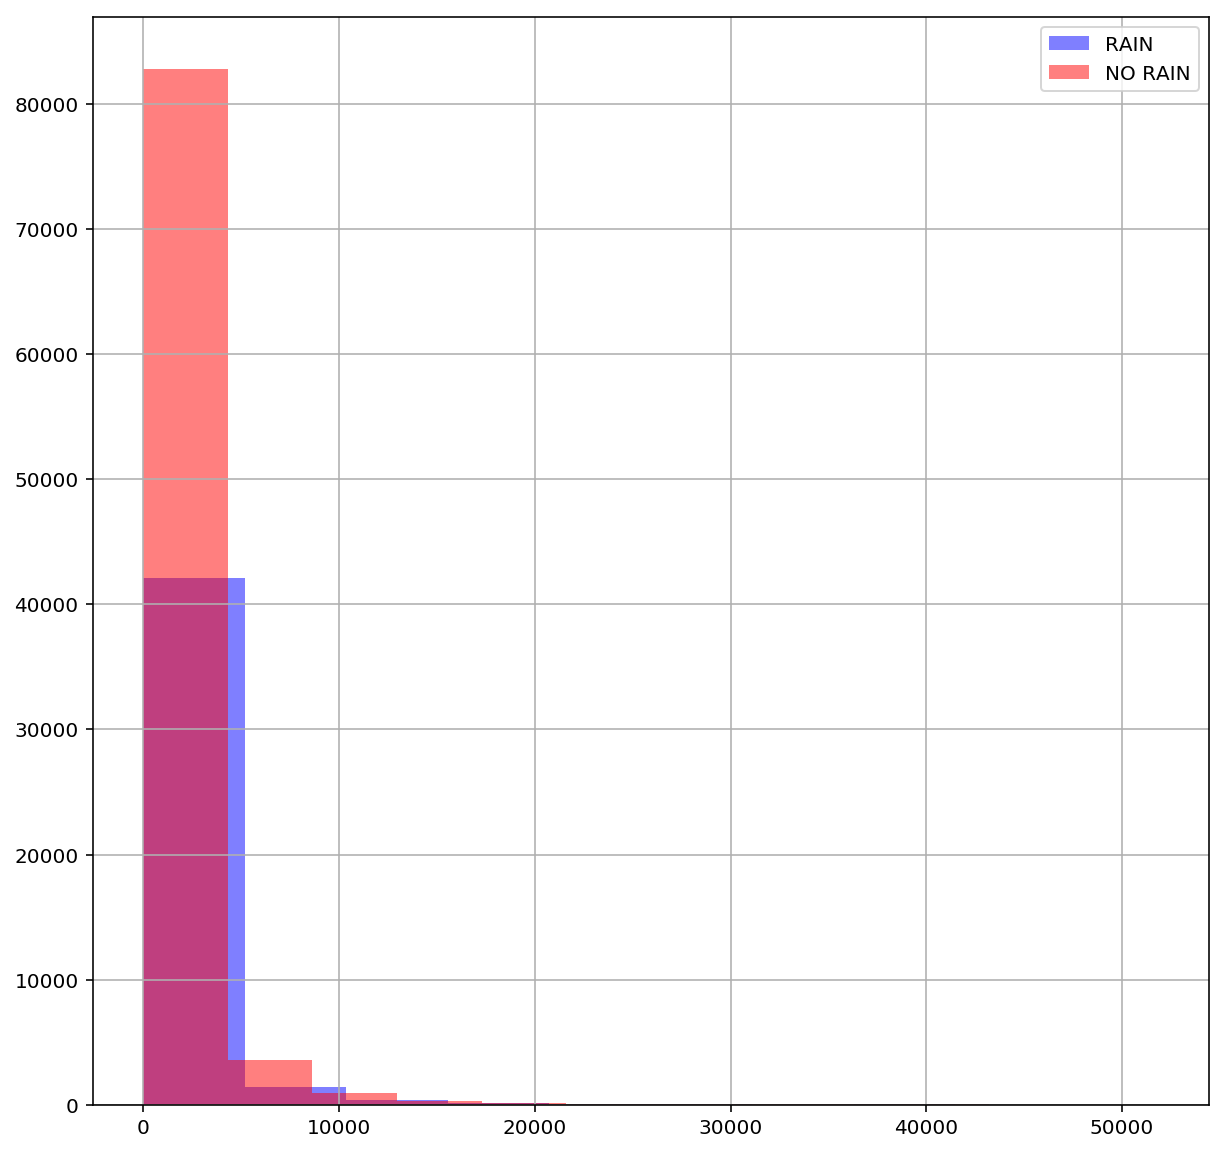

In [19]:
def entries_histogram(turnstile_weather):
    """
    Plots histogram for rainy and non-rainy days
    
    Args:
    - turnstile_weather str: Weather data CSV file
    
    Returns:
    - plt: Matplotlib histogram
    """
    
    
    plt.figure(figsize = (10,10))
    # for rainy days
    turnstile_weather[turnstile_weather["rain"]==1]["ENTRIESn_hourly"] \
        .hist(label="RAIN", alpha = 0.5, color = "blue")
    # for non-rainy days
    turnstile_weather[turnstile_weather["rain"]==0]["ENTRIESn_hourly"] \
        .hist(label="NO RAIN", alpha = 0.5, color = "red")
    plt.legend()
    return plt
entries_histogram(df);

### *Exercise 2.7

The data you just plotted is in what kind of distribution? Is there a difference in distribution between rainy and non-rainy days?

This distribution is highly right-skewed for both the cases. Hourly entries are significantly higher when it doesn't rain. It means more people use the subway when it is not raining.

### *Exercise 2.8

Build a function that returns:

1. The mean of entries when it's raining
2. The mean of entries when it's not raining




In [20]:
import numpy as np

import pandas

def means(turnstile_weather):
    """
    Calculates the means of hourly entries based on rainy condition
    
    Args:
    - turnstile_weather str: Weather data CSV file
    
    Returns:
    - with_rain_mean float: Mean of hourly entries when it rains
    - with_rain_mean float: Mean of hourly entries when it doesn't rain
    """
    df_rain = turnstile_weather[turnstile_weather["rain"] == 1]["ENTRIESn_hourly"]
    df_nrain = turnstile_weather[turnstile_weather["rain"] == 0]["ENTRIESn_hourly"]
    with_rain_mean = np.mean(df_rain)
    without_rain_mean = np.mean(df_nrain)
    
    
    return with_rain_mean, without_rain_mean

means(df)

(1105.4463767458733, 1090.278780151855)

Answer to the following questions according to your functions' exits:

1. What is the mean of entries when it's raining?
2. What is the mean of entries when it's not raining?


Average number of hourly entries on rainy days is 1105, and that on non-rainy days is 1090.

<a id="s3"></a>
## Part 3 - MapReduce

### *Exercise 3.1*

The entry for this exercise is the same file from the previous session. You can download the file from this link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now, we will create a mapper. For each entry line, the mapper exit must PRINT (not return) UNIT as a key, and the number of ENTRIESn_hourly as the value. Separate the key and the value with a tab. For example: 'R002 \ t105105.0'

Export your mapper into a file named mapper_result.txt and send it with your submission. The code for exporting your mapper is already written in the code below.

In [21]:
import sys

def mapper():
    """
    Parses "UNIT" and "ENTRIESn_hourly" for each row and prints to stdout
    """
    

    for line in sys.stdin:
        
        observation = line.strip().split(",")
        
        if len(observation) >= 7:
            unit = observation[1]
            entriesn_hourly = observation[6]

            print "%s\t%s" % (unit, entriesn_hourly)




sys.stdin = open('turnstile_data_master_with_weather.csv')
sys.stdout = open('mapper_result.txt', 'w')
mapper()

### *Exercise 3.2*

Now, create the reducer. Given the mapper result from the previous exercise, the reducer must print (not return) one line per UNIT, with the total number of ENTRIESn_hourly during May (which is our data duration), separated by a tab. An example of exit line from the reducer may look like this: 'R001 \ t500625.0'

You can assume that the entry for the reducer is ordered in a way that all lines corresponding to a particular unit are grouped. However, the reducer exit will have repetition, as there are stores that appear in different files' locations.

Export your reducer into a file named reducer_result.txt and send it with your submission.

In [22]:
def reducer():
    
    old_key = None
    entries_count = 0

    for line in sys.stdin:
        
        row = line.strip().split("\t")
        
        if len(row) != 2:
            continue
        
        this_key, this_entry = row
        try:
            if (old_key) and (old_key != this_key):
                print "%s\t%s" % (old_key, entries_count)
                old_key = this_key
                entries_count = 0
            old_key = this_key
            entries_count += float(this_entry)
        except:
            continue
        
sys.stdin = open('mapper_result.txt')
sys.stdout = open('reducer_result.txt', 'w')
reducer()

<a id="conclusion"></a>
## Conclusion

We compared the hourly trends for Subway user when it rains vs when it doesn't rain. From the graph here, it looks like both distributions are skewed and on an average people use subway more when sky is clear.

Then we used Hadoop Streaming to perform a MapReduce job in Python. Mapper function return the number of hourly entries for every unit.

And since the keys are already sorted in `sys.stdin` when passing to `mapper()`, there is **no need to perform the intermediate shuffle sort step.** All we have to do is pass the output of `mapper()` to `reducer()`.

Reducer performs aggregated sum over all keys.

The result is a single value for every key(unit in this case for every turnstile interactions with subway users).